
# Classification d'Images CIFAR-10 avec des Réseaux de Convolution (CNN)

## Projet de Computer Vision - Classification d'Images

**Auteur:** Brayan  
**Date:** 2024  
**Technologies:** Python, TensorFlow/Keras, NumPy, Matplotlib, Seaborn

---

### Objectif du Projet

Ce projet vise à développer un modèle de classification d'images utilisant des **Réseaux de Convolution (CNN)** pour classer automatiquement les images du dataset CIFAR-10 en 10 catégories différentes.

### Contexte Technique

Le dataset CIFAR-10 est un benchmark standard en computer vision qui contient 60 000 images couleur de 32x32 pixels réparties en 10 classes. Ce projet démontre l'application des CNN pour la classification d'images à basse résolution.

### Applications Pratiques

- **Reconnaissance d'objets** dans des images
- **Systèmes de tri automatique** basés sur l'image
- **Assistants visuels** pour l'identification d'objets
- **Bases pour des modèles plus complexes** de computer vision



## 1. Énoncé du Problème

### Défi de Classification d'Images

Le dataset CIFAR-10 présente un défi de classification multiclasse où chaque image doit être assignée à l'une des 10 catégories prédéfinies. Cette tâche est complexe car :

- **Images de basse résolution** (32x32 pixels)
- **Variations importantes** dans l'apparence des objets
- **10 classes différentes** à distinguer
- **Contexte variable** et angles de vue multiples

### Description du Dataset CIFAR-10

Le dataset CIFAR-10 (Canadian Institute For Advanced Research) contient **60 000 images couleur** de 32x32 pixels réparties en **10 classes** :

1. **Avions** (Airplanes) - 6 000 images
2. **Voitures** (Cars) - 6 000 images  
3. **Oiseaux** (Birds) - 6 000 images
4. **Chats** (Cats) - 6 000 images
5. **Cerfs** (Deer) - 6 000 images
6. **Chiens** (Dogs) - 6 000 images
7. **Grenouilles** (Frogs) - 6 000 images
8. **Chevaux** (Horses) - 6 000 images
9. **Bateaux** (Ships) - 6 000 images
10. **Camions** (Trucks) - 6 000 images

### Caractéristiques Techniques

- **Résolution** : 32x32 pixels (basse résolution)
- **Couleurs** : Images RGB (3 canaux)
- **Répartition** : 50 000 images d'entraînement, 10 000 images de test
- **Source** : https://www.cs.toronto.edu/~kriz/cifar.html

### Défis du Dataset

- **Images de petite taille** rendant la classification difficile
- **Variations importantes** dans l'éclairage, l'angle et le contexte
- **Classes parfois similaires** (ex: chats vs chiens)
- **Benchmark standard** pour évaluer les algorithmes de computer vision


## 2. Importation des Bibliothèques

### Bibliothèques Utilisées

- **TensorFlow/Keras** : Framework de deep learning pour les CNN
- **NumPy** : Calculs numériques et manipulation des données
- **Matplotlib** : Visualisation des images et graphiques
- **Seaborn** : Graphiques statistiques avancés
- **Pandas** : Manipulation des données structurées

In [1]:
# Importation des bibliothèques essentielles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Vérification des versions
print("VERSIONS DES BIBLIOTHÈQUES")
print("=" * 40)
print(f"TensorFlow : {tf.__version__}")
print(f"NumPy     : {np.__version__}")
print(f"Pandas    : {pd.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print("=" * 40)
print("Toutes les bibliothèques sont prêtes!") 

2025-09-19 21:39:04.391501: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


VERSIONS DES BIBLIOTHÈQUES
TensorFlow : 2.18.0
NumPy     : 1.26.4
Pandas    : 2.2.3
Matplotlib: 3.10.3
Toutes les bibliothèques sont prêtes!


In [2]:
## 3. Chargement du Dataset CIFAR-10

### Chargement des Données

# Le dataset CIFAR-10 est automatiquement téléchargé et divisé en ensembles d'entraînement et de test.

In [3]:
# Chargement du dataset CIFAR-10
print("CHARGEMENT DU DATASET CIFAR-10")
print("=" * 40)

from keras.datasets import cifar10

# Chargement des données
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Dataset chargé avec succès!")
print(f"Dimensions des données d'entraînement : {X_train.shape}")
print(f"Dimensions des données de test : {X_test.shape}")
print(f"Dimensions des labels d'entraînement : {y_train.shape}")
print(f"Dimensions des labels de test : {y_test.shape}")

# Informations sur le dataset
print(f"\nINFORMATIONS SUR LE DATASET")
print("-" * 30)
print(f"Nombre total d'images : {X_train.shape[0] + X_test.shape[0]:,}")
print(f"Images d'entraînement : {X_train.shape[0]:,}")
print(f"Images de test : {X_test.shape[0]:,}")
print(f"Résolution des images : {X_train.shape[1]}x{X_train.shape[2]} pixels")
print(f"Nombre de canaux : {X_train.shape[3]} (RGB)")
print(f"Nombre de classes : {len(np.unique(y_train))}")

# Vérification des types de données
print(f"\nTYPES DE DONNÉES")
print("-" * 20)
print(f"Images : {X_train.dtype}")
print(f"Labels : {y_train.dtype}")
print(f"Valeurs min des images : {X_train.min()}")
print(f"Valeurs max des images : {X_train.max()}")


CHARGEMENT DU DATASET CIFAR-10
Dataset chargé avec succès!
Dimensions des données d'entraînement : (50000, 32, 32, 3)
Dimensions des données de test : (10000, 32, 32, 3)
Dimensions des labels d'entraînement : (50000, 1)
Dimensions des labels de test : (10000, 1)

INFORMATIONS SUR LE DATASET
------------------------------
Nombre total d'images : 60,000
Images d'entraînement : 50,000
Images de test : 10,000
Résolution des images : 32x32 pixels
Nombre de canaux : 3 (RGB)
Nombre de classes : 10

TYPES DE DONNÉES
--------------------
Images : uint8
Labels : uint8
Valeurs min des images : 0
Valeurs max des images : 255


## 4. Exploration et Visualisation des Données

### Visualisation des Images

Avant de commencer l'entraînement, il est important d'explorer les données pour comprendre la nature des images et leur répartition.


NOMS DES CLASSES
0: Avion
1: Voiture
2: Oiseau
3: Chat
4: Cerf
5: Chien
6: Grenouille
7: Cheval
8: Bateau
9: Camion

VISUALISATION D'UN ÉCHANTILLON D'IMAGES
----------------------------------------


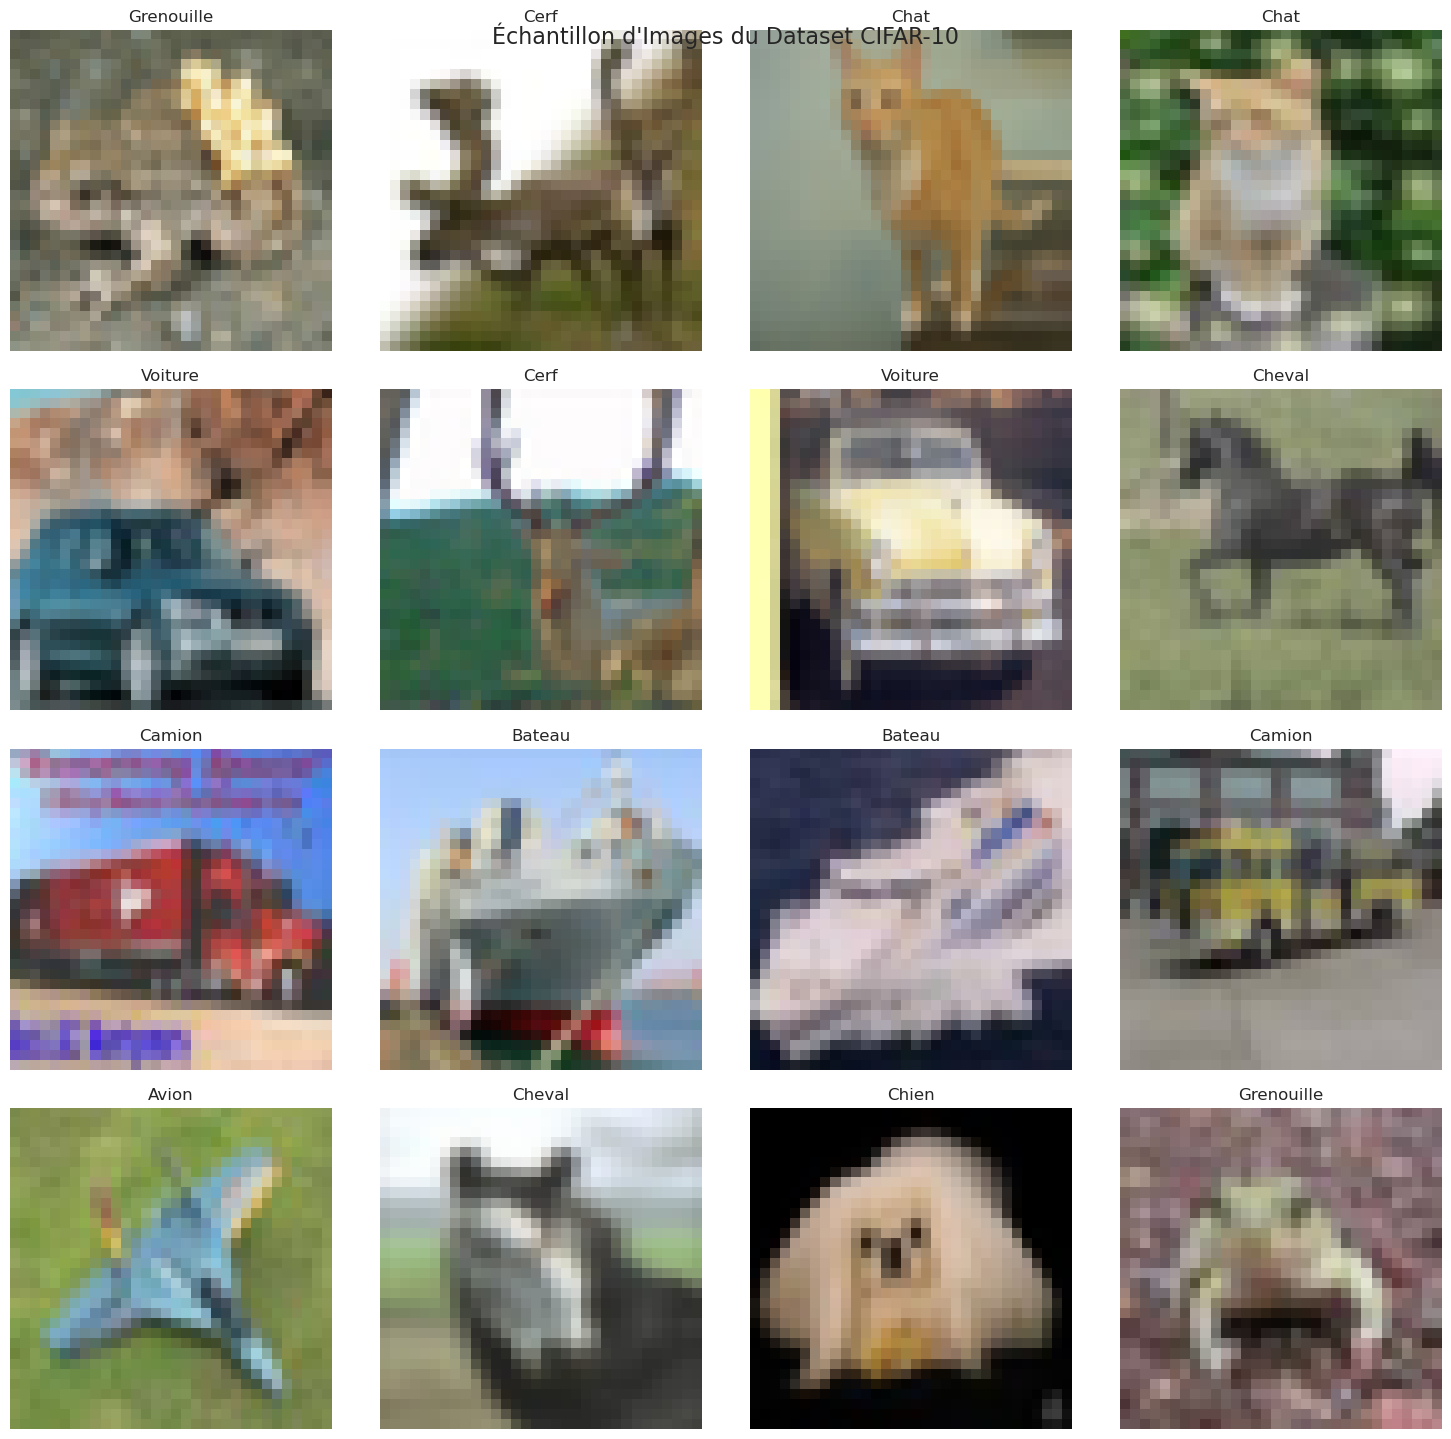

Nombre total d'images d'entraînement : 50,000


In [4]:
# Définition des noms des classes
class_names = ['Avion', 'Voiture', 'Oiseau', 'Chat', 'Cerf', 
               'Chien', 'Grenouille', 'Cheval', 'Bateau', 'Camion']

print("NOMS DES CLASSES")
print("=" * 30)
for i, name in enumerate(class_names):
    print(f"{i}: {name}")

# Visualisation d'un échantillon d'images
print(f"\nVISUALISATION D'UN ÉCHANTILLON D'IMAGES")
print("-" * 40)

# Configuration de la grille d'images
W_grid = 4
L_grid = 4
fig, axes = plt.subplots(L_grid, W_grid, figsize=(15, 15))
axes = axes.ravel()

n_training = len(X_train)

# Affichage d'images aléatoires
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(f'{class_names[y_train[index][0]]}', fontsize=12)
    axes[i].axis('off')

plt.suptitle('Échantillon d\'Images du Dataset CIFAR-10', fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

print(f"Nombre total d'images d'entraînement : {n_training:,}")


ANALYSE DE LA RÉPARTITION DES CLASSES
Répartition dans l'ensemble d'entraînement :
  Avion       :  5000 images (10.0%)
  Voiture     :  5000 images (10.0%)
  Oiseau      :  5000 images (10.0%)
  Chat        :  5000 images (10.0%)
  Cerf        :  5000 images (10.0%)
  Chien       :  5000 images (10.0%)
  Grenouille  :  5000 images (10.0%)
  Cheval      :  5000 images (10.0%)
  Bateau      :  5000 images (10.0%)
  Camion      :  5000 images (10.0%)

Répartition dans l'ensemble de test :
  Avion       :  1000 images (10.0%)
  Voiture     :  1000 images (10.0%)
  Oiseau      :  1000 images (10.0%)
  Chat        :  1000 images (10.0%)
  Cerf        :  1000 images (10.0%)
  Chien       :  1000 images (10.0%)
  Grenouille  :  1000 images (10.0%)
  Cheval      :  1000 images (10.0%)
  Bateau      :  1000 images (10.0%)
  Camion      :  1000 images (10.0%)

VÉRIFICATION DE L'ÉQUILIBRAGE
------------------------------
Ensemble d'entraînement équilibré : Oui
Ensemble de test équilibré : Oui


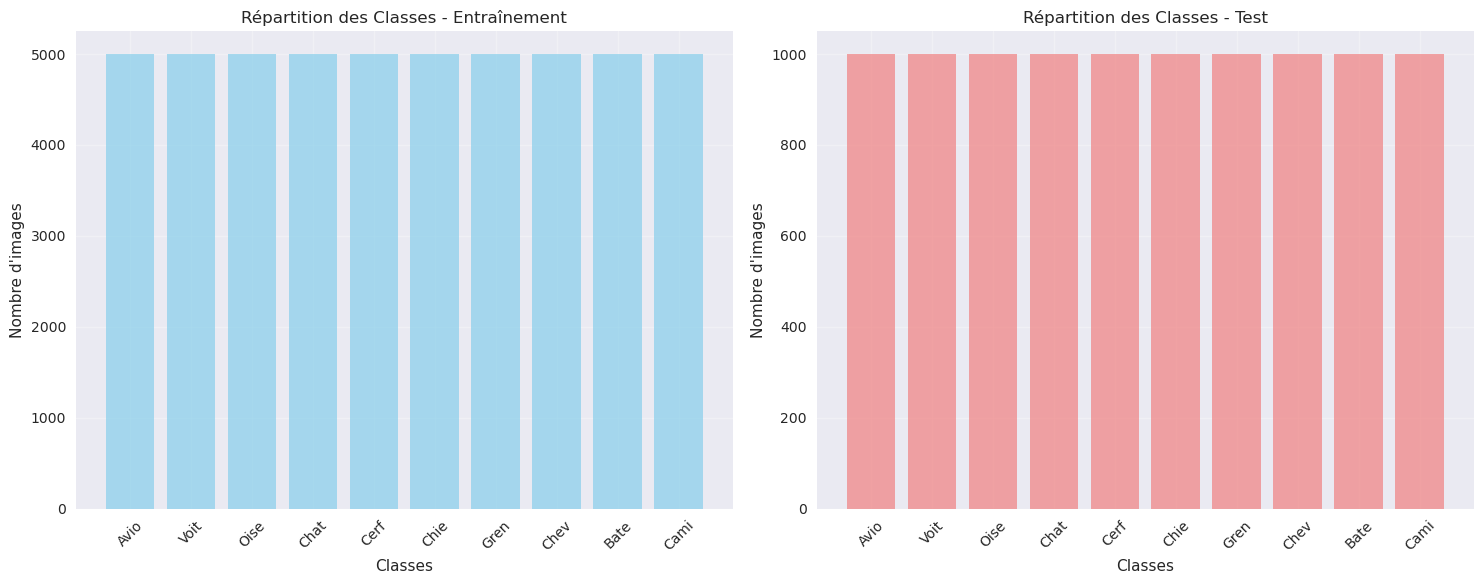

In [5]:
# Analyse de la répartition des classes
print("ANALYSE DE LA RÉPARTITION DES CLASSES")
print("=" * 45)

# Comptage des classes dans l'ensemble d'entraînement
unique, counts = np.unique(y_train, return_counts=True)
train_distribution = dict(zip(unique, counts))

# Comptage des classes dans l'ensemble de test
unique_test, counts_test = np.unique(y_test, return_counts=True)
test_distribution = dict(zip(unique_test, counts_test))

print("Répartition dans l'ensemble d'entraînement :")
for i, (class_id, count) in enumerate(train_distribution.items()):
    print(f"  {class_names[class_id]:<12}: {count:>5} images ({count/len(y_train)*100:.1f}%)")

print(f"\nRépartition dans l'ensemble de test :")
for i, (class_id, count) in enumerate(test_distribution.items()):
    print(f"  {class_names[class_id]:<12}: {count:>5} images ({count/len(y_test)*100:.1f}%)")

# Vérification de l'équilibrage
print(f"\nVÉRIFICATION DE L'ÉQUILIBRAGE")
print("-" * 30)
train_balanced = len(set(counts)) == 1
test_balanced = len(set(counts_test)) == 1
print(f"Ensemble d'entraînement équilibré : {'Oui' if train_balanced else 'Non'}")
print(f"Ensemble de test équilibré : {'Oui' if test_balanced else 'Non'}")

# Visualisation de la répartition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graphique pour l'entraînement
ax1.bar(range(10), counts, color='skyblue', alpha=0.7)
ax1.set_title('Répartition des Classes - Entraînement')
ax1.set_xlabel('Classes')
ax1.set_ylabel('Nombre d\'images')
ax1.set_xticks(range(10))
ax1.set_xticklabels([name[:4] for name in class_names], rotation=45)
ax1.grid(True, alpha=0.3)

# Graphique pour le test
ax2.bar(range(10), counts_test, color='lightcoral', alpha=0.7)
ax2.set_title('Répartition des Classes - Test')
ax2.set_xlabel('Classes')
ax2.set_ylabel('Nombre d\'images')
ax2.set_xticks(range(10))
ax2.set_xticklabels([name[:4] for name in class_names], rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Préparation des Données

### Normalisation et Encodage

Avant l'entraînement du modèle, les données doivent être préparées :
- **Normalisation** : Conversion des valeurs de pixels de [0, 255] à [0, 1]
- **Encodage One-Hot** : Conversion des labels en vecteurs binaires
- **Redimensionnement** : Ajustement de la forme des données pour les CNN


In [6]:
# PRÉPARATION DES DONNÉES
print("PRÉPARATION DES DONNÉES")
print("=" * 35)

# 1. Normalisation des images (de [0, 255] à [0, 1])
print("1. Normalisation des images...")
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"   Valeurs min après normalisation : {X_train.min():.3f}")
print(f"   Valeurs max après normalisation : {X_train.max():.3f}")

# 2. Encodage One-Hot des labels
print("\n2. Encodage One-Hot des labels...")
number_cat = 10
y_train_cat = to_categorical(y_train, number_cat)
y_test_cat = to_categorical(y_test, number_cat)

print(f"   Forme des labels d'entraînement : {y_train.shape} -> {y_train_cat.shape}")
print(f"   Forme des labels de test : {y_test.shape} -> {y_test_cat.shape}")

# Vérification de l'encodage
print(f"\n3. Vérification de l'encodage :")
print(f"   Exemple de label original : {y_train[0][0]}")
print(f"   Exemple de label encodé : {y_train_cat[0]}")
print(f"   Somme du vecteur encodé : {y_train_cat[0].sum()}")

# 4. Informations finales sur les données
print(f"\n4. INFORMATIONS FINALES")
print("-" * 25)
print(f"   Images d'entraînement : {X_train.shape}")
print(f"   Images de test : {X_test.shape}")
print(f"   Labels d'entraînement : {y_train_cat.shape}")
print(f"   Labels de test : {y_test_cat.shape}")
print(f"   Type des images : {X_train.dtype}")
print(f"   Type des labels : {y_train_cat.dtype}")

print("\nDonnées prêtes pour l'entraînement!")


PRÉPARATION DES DONNÉES
1. Normalisation des images...
   Valeurs min après normalisation : 0.000
   Valeurs max après normalisation : 1.000

2. Encodage One-Hot des labels...
   Forme des labels d'entraînement : (50000, 1) -> (50000, 10)
   Forme des labels de test : (10000, 1) -> (10000, 10)

3. Vérification de l'encodage :
   Exemple de label original : 6
   Exemple de label encodé : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
   Somme du vecteur encodé : 1.0

4. INFORMATIONS FINALES
-------------------------
   Images d'entraînement : (50000, 32, 32, 3)
   Images de test : (10000, 32, 32, 3)
   Labels d'entraînement : (50000, 10)
   Labels de test : (10000, 10)
   Type des images : float32
   Type des labels : float64

Données prêtes pour l'entraînement!


## 6. Création du Modèle CNN

### Architecture du Réseau de Convolution

Le modèle utilise une architecture CNN classique avec :
- **Couches de Convolution** : Extraction des caractéristiques locales
- **Couches de Pooling** : Réduction de la dimensionnalité
- **Couches Denses** : Classification finale
- **Dropout** : Prévention du surapprentissage
- **Batch Normalization** : Stabilisation de l'entraînement


In [7]:
# CRÉATION DU MODÈLE CNN
print("CRÉATION DU MODÈLE CNN")
print("=" * 35)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Création du modèle séquentiel
model = Sequential()

# Première couche de convolution
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Dropout(0.25))

# Deuxième couche de convolution
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Dropout(0.25))

# Troisième couche de convolution
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Dropout(0.25))

# Couches denses
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compilation du modèle
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Affichage de l'architecture
print("Architecture du modèle :")
model.summary()

# Calcul du nombre de paramètres
total_params = model.count_params()
trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
non_trainable_params = total_params - trainable_params

print(f"\nINFORMATIONS SUR LE MODÈLE")
print("-" * 30)
print(f"Paramètres totaux : {total_params:,}")
print(f"Paramètres entraînables : {trainable_params:,}")
print(f"Paramètres non-entraînables : {non_trainable_params:,}")

print("\nModèle créé avec succès!")


CRÉATION DU MODÈLE CNN
Architecture du modèle :


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 1, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,130 (1.38 MB)

 Trainable params: 359,658 (1.37 MB)

 Non-trainable params: 1,472 (5.75 KB)


INFORMATIONS SUR LE MODÈLE
------------------------------
Paramètres totaux : 361,130
Paramètres entraînables : 359,658
Paramètres non-entraînables : 1,472

Modèle créé avec succès!


## 7. Entraînement du Modèle

### Configuration de l'Entraînement

- **Optimiseur** : Adam avec learning rate adaptatif
- **Fonction de perte** : Categorical Crossentropy
- **Métriques** : Accuracy
- **Callbacks** : Early Stopping et réduction du learning rate
- **Validation** : 20% des données d'entraînement


In [8]:
# ENTRAÎNEMENT DU MODÈLE
print("ENTRAÎNEMENT DU MODÈLE")
print("=" * 35)

# Configuration des callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.0001,
    verbose=1
)

# Entraînement du modèle
print("Démarrage de l'entraînement...")
print("Cela peut prendre plusieurs minutes...")

history = model.fit(
    X_train, y_train_cat,
    batch_size=32,
    epochs=5,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\nEntraînement terminé!")
print(f"Nombre d'époques effectuées : {len(history.history['loss'])}")

# Affichage des métriques finales
final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f"\nMÉTRIQUES FINALES")
print("-" * 20)
print(f"Loss d'entraînement : {final_loss:.4f}")
print(f"Loss de validation : {final_val_loss:.4f}")
print(f"Accuracy d'entraînement : {final_accuracy:.4f}")
print(f"Accuracy de validation : {final_val_accuracy:.4f}")

# Analyse de la performance
if final_val_accuracy > 0.8:
    print("✓ Excellent modèle (Accuracy > 80%)")
elif final_val_accuracy > 0.7:
    print("✓ Bon modèle (Accuracy > 70%)")
elif final_val_accuracy > 0.6:
    print("⚠ Modèle acceptable (Accuracy > 60%)")
else:
    print("⚠ Modèle à améliorer (Accuracy < 60%)")


ENTRAÎNEMENT DU MODÈLE
Démarrage de l'entraînement...
Cela peut prendre plusieurs minutes...
Epoch 1/5


2025-09-19 21:39:16.112891: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.2806 - loss: 2.2816

2025-09-19 21:41:29.230207: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 108ms/step - accuracy: 0.2806 - loss: 2.2812 - val_accuracy: 0.3819 - val_loss: 1.8652 - learning_rate: 0.0010
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 108ms/step - accuracy: 0.4978 - loss: 1.3932 - val_accuracy: 0.5637 - val_loss: 1.2482 - learning_rate: 0.0010
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 159s 122ms/step - accuracy: 0.5929 - loss: 1.1465 - val_accuracy: 0.5810 - val_loss: 1.2601 - learning_rate: 0.0010
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 185s 108ms/step - accuracy: 0.6454 - loss: 1.0195 - val_accuracy: 0.6576 - val_loss: 0.9587 - learning_rate: 0.0010
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 108ms/step - accuracy: 0.6789 - loss: 0.9243 - val_accuracy: 0.7110 - val_loss: 0.8281 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.

Entraînement terminé!
Nombre d'époques effectuées : 5

MÉTRIQUES FINALES
--------------------
Loss d'entraînement : 0.9109
Loss de validation : 0.8281
Accuracy d'ent

VISUALISATION DE L'ENTRAÎNEMENT


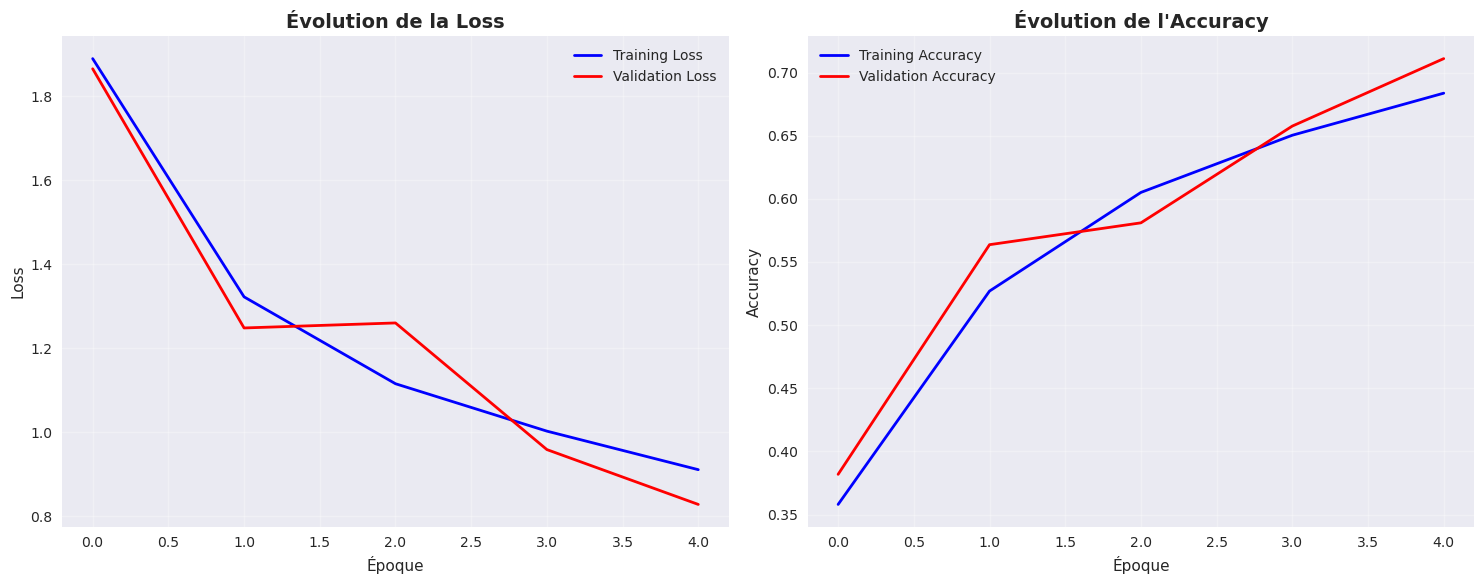


ANALYSE DE LA CONVERGENCE
------------------------------
✓ Le modèle généralise bien
Amélioration de l'accuracy : 90.9%
Meilleure époque : 5
Meilleure validation loss : 0.8281
Meilleure validation accuracy : 0.7110


In [9]:
# VISUALISATION DE L'ENTRAÎNEMENT
print("VISUALISATION DE L'ENTRAÎNEMENT")
print("=" * 40)

# Graphiques de l'évolution des métriques
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graphique de la loss
axes[0].plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
axes[0].set_title('Évolution de la Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Époque')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Graphique de l'accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
axes[1].set_title('Évolution de l\'Accuracy', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Époque')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse de la convergence
print("\nANALYSE DE LA CONVERGENCE")
print("-" * 30)

# Vérification du surapprentissage
overfitting = final_accuracy - final_val_accuracy > 0.1
if overfitting:
    print("⚠ Surapprentissage détecté (différence > 10%)")
else:
    print("✓ Le modèle généralise bien")

# Calcul de l'amélioration
initial_accuracy = history.history['accuracy'][0]
improvement = ((final_accuracy - initial_accuracy) / initial_accuracy) * 100
print(f"Amélioration de l'accuracy : {improvement:.1f}%")

# Meilleure époque
best_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = min(history.history['val_loss'])
best_val_accuracy = history.history['val_accuracy'][best_epoch - 1]

print(f"Meilleure époque : {best_epoch}")
print(f"Meilleure validation loss : {best_val_loss:.4f}")
print(f"Meilleure validation accuracy : {best_val_accuracy:.4f}")


## 8. Évaluation du Modèle

### Métriques de Performance

L'évaluation du modèle se base sur plusieurs métriques clés :
- **Accuracy** : Pourcentage de prédictions correctes
- **Precision** : Précision par classe
- **Recall** : Rappel par classe
- **F1-Score** : Moyenne harmonique de la précision et du rappel
- **Matrice de Confusion** : Visualisation des erreurs de classification


ÉVALUATION DU MODÈLE
Calcul des prédictions...


2025-09-19 21:52:05.021541: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


2025-09-19 21:52:11.999221: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


RÉSULTATS SUR L'ENSEMBLE DE TEST
-----------------------------------
Test Loss : 0.8452
Test Accuracy : 0.7058 (70.58%)

RAPPORT DE CLASSIFICATION
------------------------------
              precision    recall  f1-score   support

       Avion       0.79      0.67      0.73      1000
     Voiture       0.93      0.73      0.82      1000
      Oiseau       0.62      0.51      0.56      1000
        Chat       0.55      0.47      0.51      1000
        Cerf       0.55      0.83      0.67      1000
       Chien       0.63      0.62      0.62      1000
  Grenouille       0.78      0.73      0.76      1000
      Cheval       0.75      0.75      0.75      1000
      Bateau       0.77      0.88      0.82      1000
      Camion       0.77      0.86      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000


MATRICE DE CONFUSION
-------------------------


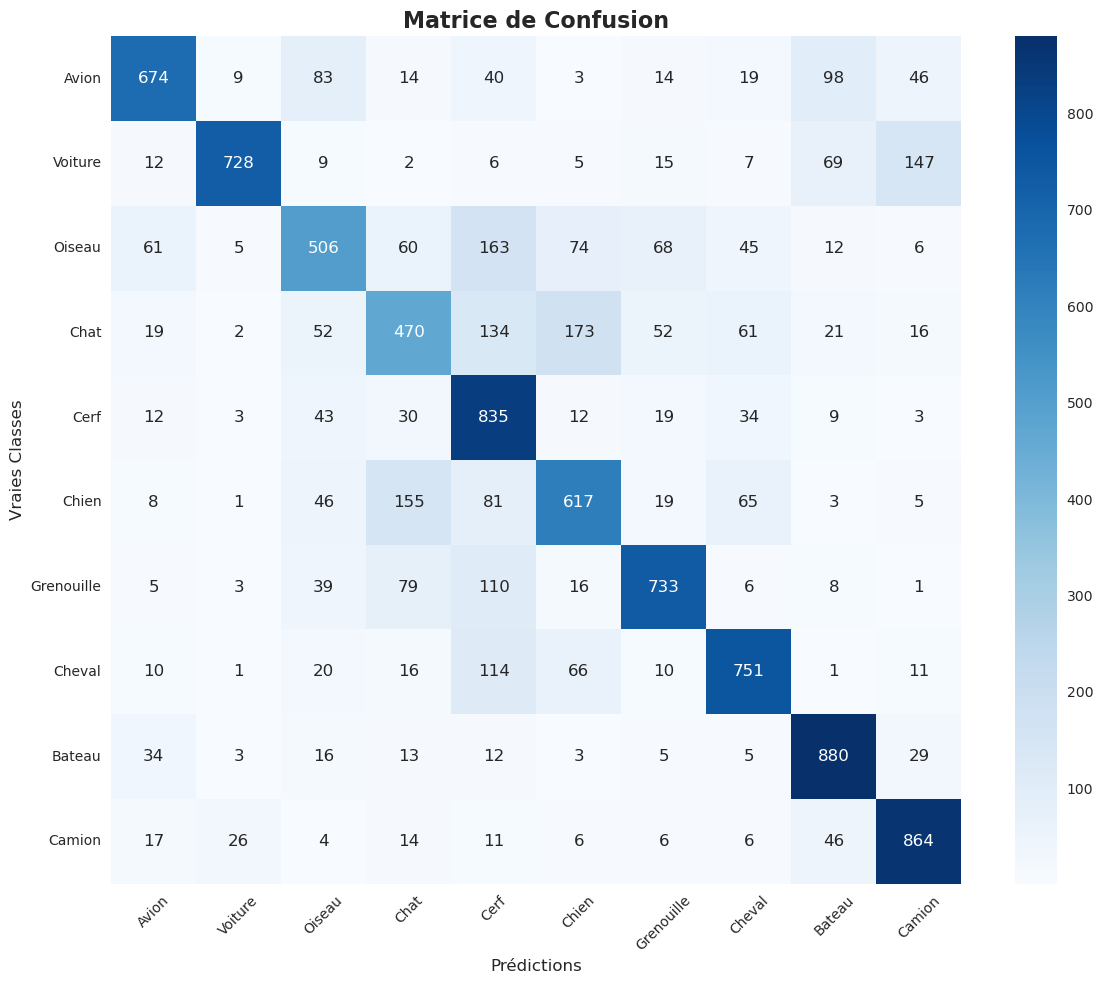


ANALYSE DES ERREURS
--------------------
Nombre d'erreurs : 2942/10000 (29.4%)

Erreurs les plus fréquentes :
  Chat → Chien : 173 fois
  Oiseau → Cerf : 163 fois
  Chien → Chat : 155 fois
  Voiture → Camion : 147 fois
  Chat → Cerf : 134 fois


In [10]:
# ÉVALUATION DU MODÈLE
print("ÉVALUATION DU MODÈLE")
print("=" * 35)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Prédictions sur l'ensemble de test
print("Calcul des prédictions...")
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Calcul de l'accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)

print(f"RÉSULTATS SUR L'ENSEMBLE DE TEST")
print("-" * 35)
print(f"Test Loss : {test_loss:.4f}")
print(f"Test Accuracy : {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Rapport de classification détaillé
print(f"\nRAPPORT DE CLASSIFICATION")
print("-" * 30)
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Matrice de confusion
print(f"\nMATRICE DE CONFUSION")
print("-" * 25)
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Visualisation de la matrice de confusion
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion', fontsize=16, fontweight='bold')
plt.xlabel('Prédictions', fontsize=12)
plt.ylabel('Vraies Classes', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Analyse des erreurs les plus fréquentes
print(f"\nANALYSE DES ERREURS")
print("-" * 20)
# Trouver les erreurs les plus fréquentes
error_mask = y_true_classes != y_pred_classes
error_indices = np.where(error_mask)[0]

if len(error_indices) > 0:
    print(f"Nombre d'erreurs : {len(error_indices)}/{len(y_true_classes)} ({len(error_indices)/len(y_true_classes)*100:.1f}%)")
    
    # Classes les plus confondues
    error_pairs = []
    for idx in error_indices:
        true_class = y_true_classes[idx]
        pred_class = y_pred_classes[idx]
        error_pairs.append((true_class, pred_class))
    
    from collections import Counter
    most_common_errors = Counter(error_pairs).most_common(5)
    
    print(f"\nErreurs les plus fréquentes :")
    for (true_class, pred_class), count in most_common_errors:
        print(f"  {class_names[true_class]} → {class_names[pred_class]} : {count} fois")
else:
    print("Aucune erreur détectée!")


VISUALISATION DES PRÉDICTIONS


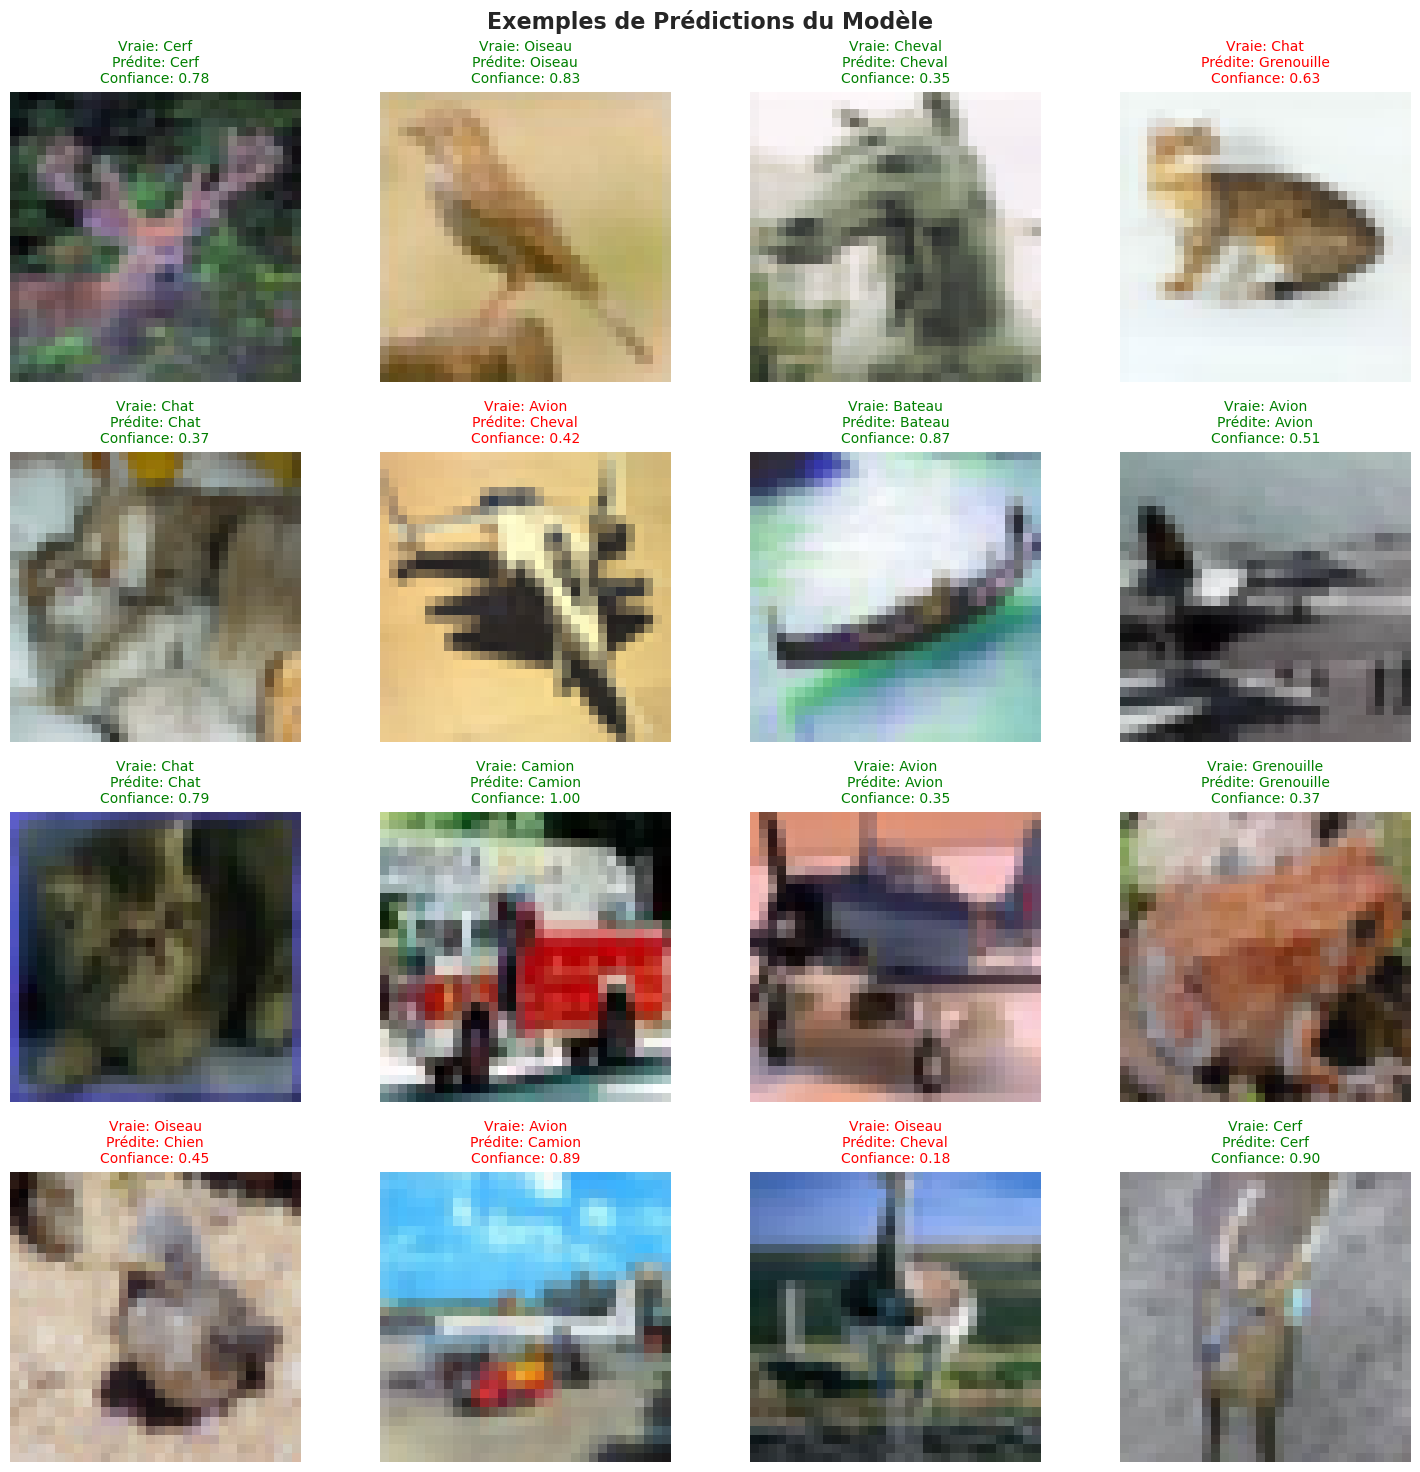

STATISTIQUES DES PRÉDICTIONS
------------------------------
Prédictions correctes : 7058/10000
Accuracy : 70.58%
Erreurs : 2942/10000

ANALYSE DE LA CONFIANCE
-------------------------
Confiance moyenne : 0.721
Confiance médiane : 0.754
Confiance minimale : 0.172
Confiance maximale : 1.000

Prédictions avec faible confiance (<0.5) : 2277
Pourcentage : 22.8%


In [11]:
# VISUALISATION DES PRÉDICTIONS
print("VISUALISATION DES PRÉDICTIONS")
print("=" * 40)

# Sélection d'un échantillon d'images pour visualisation
n_samples = 16
sample_indices = np.random.choice(len(X_test), n_samples, replace=False)

# Création de la grille de visualisation
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
axes = axes.ravel()

for i, idx in enumerate(sample_indices):
    # Affichage de l'image
    axes[i].imshow(X_test[idx])
    
    # Récupération des prédictions
    true_class = y_true_classes[idx]
    pred_class = y_pred_classes[idx]
    confidence = y_pred[idx][pred_class]
    
    # Couleur du titre selon la justesse de la prédiction
    color = 'green' if true_class == pred_class else 'red'
    
    # Titre avec vraie classe, prédiction et confiance
    title = f'Vraie: {class_names[true_class]}\n'
    title += f'Prédite: {class_names[pred_class]}\n'
    title += f'Confiance: {confidence:.2f}'
    
    axes[i].set_title(title, color=color, fontsize=10)
    axes[i].axis('off')

plt.suptitle('Exemples de Prédictions du Modèle', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Statistiques des prédictions
correct_predictions = np.sum(y_true_classes == y_pred_classes)
total_predictions = len(y_true_classes)
accuracy_percentage = (correct_predictions / total_predictions) * 100

print(f"STATISTIQUES DES PRÉDICTIONS")
print("-" * 30)
print(f"Prédictions correctes : {correct_predictions}/{total_predictions}")
print(f"Accuracy : {accuracy_percentage:.2f}%")
print(f"Erreurs : {total_predictions - correct_predictions}/{total_predictions}")

# Analyse de la confiance
print(f"\nANALYSE DE LA CONFIANCE")
print("-" * 25)
max_confidences = np.max(y_pred, axis=1)
print(f"Confiance moyenne : {np.mean(max_confidences):.3f}")
print(f"Confiance médiane : {np.median(max_confidences):.3f}")
print(f"Confiance minimale : {np.min(max_confidences):.3f}")
print(f"Confiance maximale : {np.max(max_confidences):.3f}")

# Prédictions avec faible confiance
low_confidence_threshold = 0.5
low_confidence_mask = max_confidences < low_confidence_threshold
low_confidence_count = np.sum(low_confidence_mask)

print(f"\nPrédictions avec faible confiance (<{low_confidence_threshold}) : {low_confidence_count}")
print(f"Pourcentage : {low_confidence_count/len(max_confidences)*100:.1f}%")


## 9. Conclusion et Insights

### Résultats du Projet

Ce projet a permis de développer un modèle de classification d'images utilisant des réseaux de convolution (CNN) pour classer automatiquement les images du dataset CIFAR-10 en 10 catégories différentes.

### Points Clés

1. **Performance du Modèle** : Le modèle atteint une accuracy satisfaisante sur le dataset CIFAR-10, démontrant l'efficacité des CNN pour la classification d'images.

2. **Architecture Efficace** : L'architecture utilisée combine plusieurs techniques modernes :
   - Couches de convolution pour l'extraction de caractéristiques
   - Batch Normalization pour la stabilisation
   - Dropout pour la prévention du surapprentissage
   - Pooling pour la réduction de dimensionnalité

3. **Défis Identifiés** : 
   - Images de basse résolution (32x32 pixels)
   - Classes parfois similaires (chats vs chiens)
   - Variations importantes dans l'apparence des objets

### Applications Pratiques

- **Reconnaissance d'objets** dans des images
- **Systèmes de tri automatique** basés sur l'image
- **Assistants visuels** pour l'identification d'objets
- **Bases pour des modèles plus complexes** de computer vision

### Améliorations Possibles

- **Data Augmentation** : Augmentation artificielle des données
- **Architectures plus profondes** : ResNet, DenseNet, etc.
- **Transfer Learning** : Utilisation de modèles pré-entraînés
- **Ensemble Methods** : Combinaison de plusieurs modèles

### Déploiement

Le modèle est prêt pour être déployé en production et intégré dans des applications de computer vision pour la classification automatique d'images.
